# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Dương Trung Nghĩa
- MSSV: 22127293
- Lớp: 22CLC05

# Import

In [2]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [6]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [8]:
# Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.pinv(X)
        self.w = X_pinv @ y
        return self

    def get_params(self):
        return self.w


    def predict(self, X):
        return X @ self.w 

# hàm tính MAE
def mae_cal(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel())) 
def preprocess(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

In [10]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
train.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4.976444,69.396111,0.493667,6.535556,4.590889,55.136333
std,2.594647,17.369957,0.499988,1.695533,2.864570,19.187669
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9000 non-null   int64  
 1   Previous Scores                   9000 non-null   int64  
 2   Extracurricular Activities        9000 non-null   int64  
 3   Sleep Hours                       9000 non-null   int64  
 4   Sample Question Papers Practiced  9000 non-null   int64  
 5   Performance Index                 9000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 422.0 KB


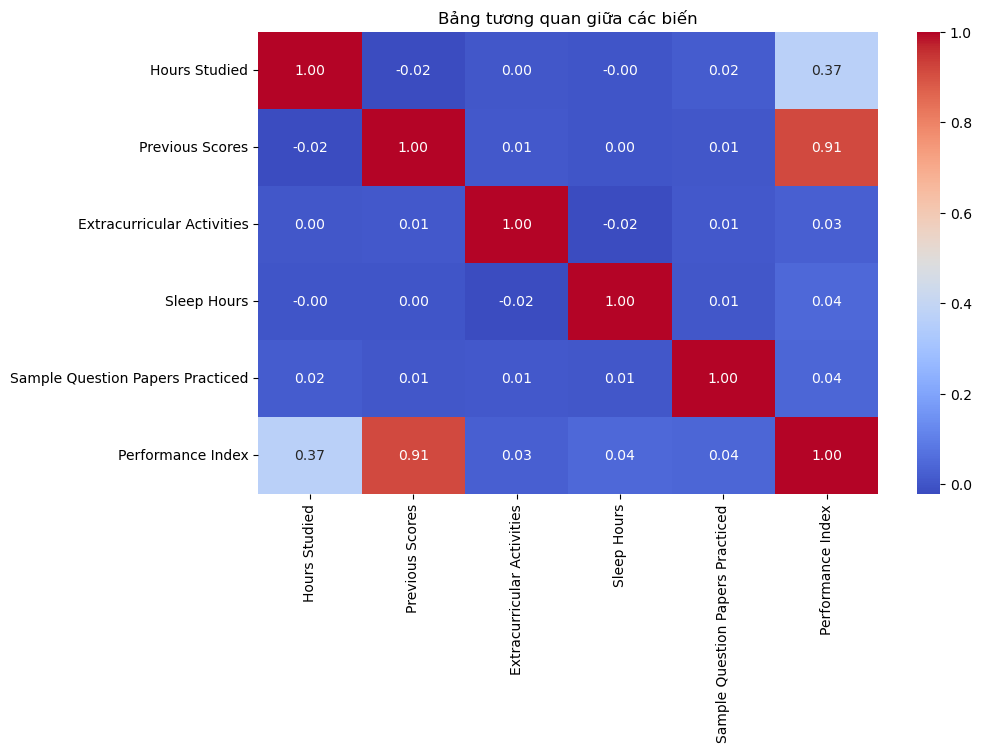

In [14]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Bảng tương quan giữa các biến')
plt.show()

### Nhận Xét Về Bảng Tương Quan Giữa Các Biến

Bảng tương quan thể hiện mối quan hệ giữa các biến trong dữ liệu với các giá trị tương quan từ -1 đến 1. Một số nhận xét quan trọng:

- **Previous Scores và Performance Index**: Có một mối tương quan dương mạnh mẽ, cho thấy học sinh có điểm số trước đây cao hơn thường đạt hiệu suất học tập tốt hơn. (0.91)
- **Hours Studied và Performance Index**: Có một mối tương quan dương vừa phải, cho thấy học nhiều giờ hơn có thể cải thiện hiệu suất học tập, nhưng không phải là yếu tố quyết định duy nhất. (0.37)
- **Sleep Hours và Performance Index**: Mối tương quan yếu hoặc không có mối quan hệ rõ ràng, gợi ý rằng số giờ ngủ không ảnh hưởng mạnh mẽ đến hiệu suất học tập trong dữ liệu này. (0.04)
- **Sample Question Papers Practiced và Performance Index**: Mối tương quan dương nhẹ, cho thấy luyện tập đề thi có thể giúp cải thiện hiệu suất, nhưng hiệu quả có thể giảm dần khi số lượng đề thi luyện tập tăng. (0.04)
- **Extracurricular Activities và Performance Index**: Mối tương quan dương yếu, cho thấy tham gia hoạt động ngoại khóa có thể có một ảnh hưởng tích cực nhẹ đến hiệu suất học tập, nhưng không phải là yếu tố quyết định chính. (0.03)

Tổng quan, bảng tương quan giúp xác định các mối quan hệ tiềm năng giữa các biến số, từ đó có thể giúp điều chỉnh các chiến lược học tập hoặc nghiên cứu thêm về các yếu tố khác ảnh hưởng đến hiệu suất học tập.
 học tập.
học tập.


<Figure size 1200x800 with 0 Axes>

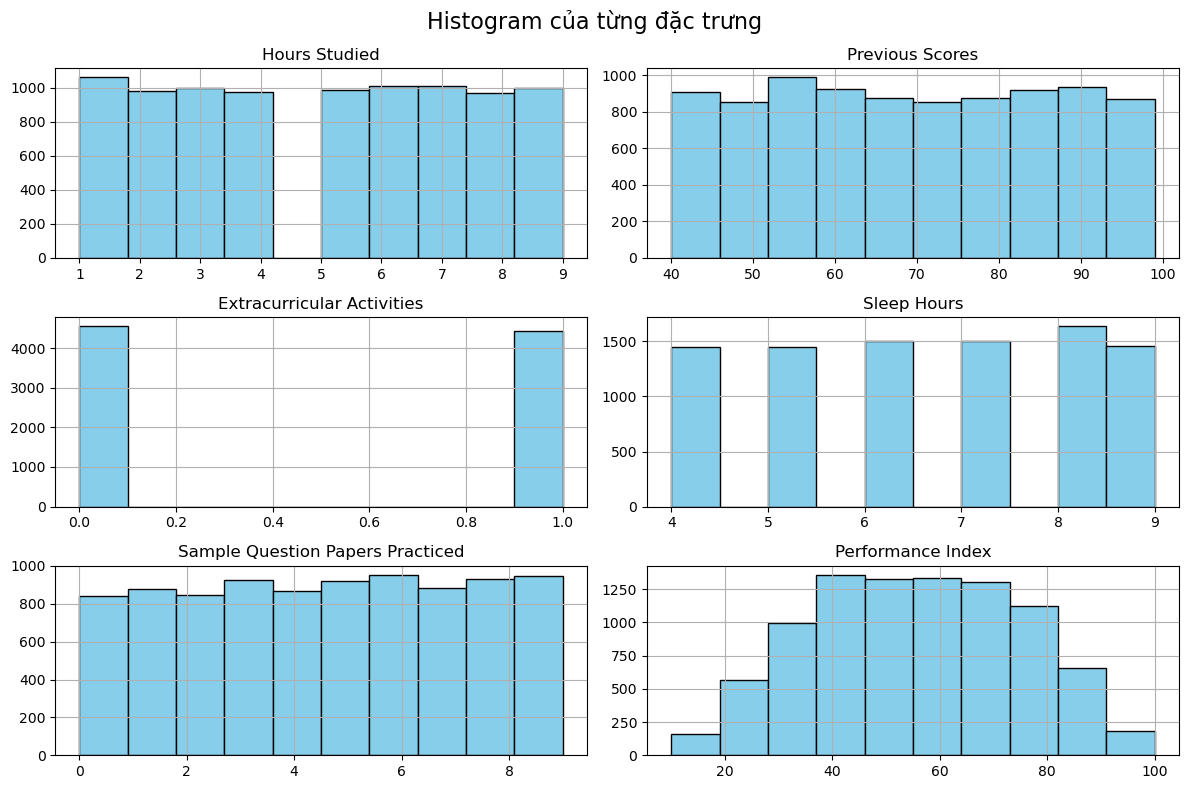

In [17]:
plt.figure(figsize=(12, 8))
train.hist(bins=10, color='skyblue', edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogram của từng đặc trưng', fontsize=16)
plt.tight_layout()
plt.show()

### Phân Tích Phân Phối Biến Số

1. **Hours Studied**: 
    - Phân phối khá đều từ **1 đến 9 giờ** học, với sự chênh lệch không đáng kể giữa các khoảng giờ.

2. **Previous Scores**: 
    - Phân phối khá đồng đều với một số lượng lớn học sinh có điểm số từ **50 đến 100**.

3. **Performance Index**: 
    - Phân phối này gần như **bìah thường** (*normal distribution*), với đa số học sinh đạt điểm trong khoảng **50 đến 80**.

4. **Sleep Hours**: 
    - Học sinh thường ngủ từ **6 đến 8 giờ**, với một số ít ngủ nhiều hơn hoặc ít hơn. Hầu hết học sinh có giờ ngủ phù hợp với khoa học.

5. **Sample Question Papers Practiced**: 
    - Số lượng đề thi mẫu được luyện tập khá đa dạng, nhưng có một sự tập trung cao ở mức **8 đề**.


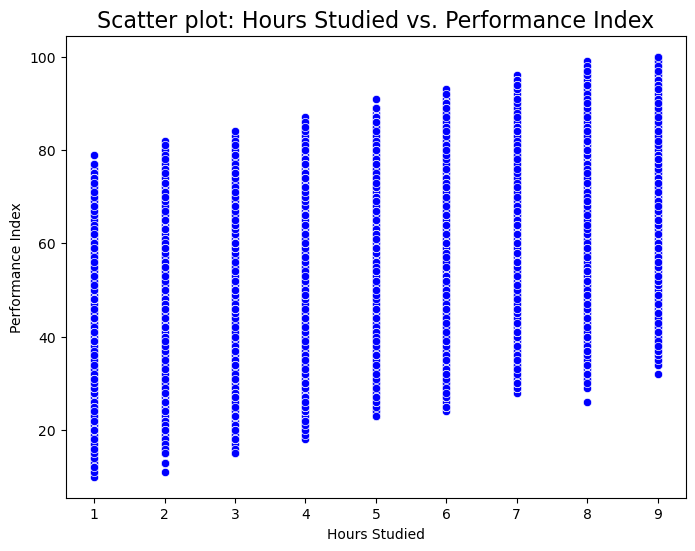

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=train, color='blue')
plt.title('Scatter plot: Hours Studied vs. Performance Index', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

### Mối Quan Hệ Giữa Giờ Học và Hiệu Suất

Biểu đồ này cho thấy một **mối quan hệ tích cực** giữa số giờ học và chỉ số hiệu suất. Cụ thể:

- **Học sinh học nhiều giờ hơn** thường có **chỉ số hiệu suất cao hơn**.
- Tuy nhiên, không có sự **tăng trưởng tuyến tính hoàn toàn** - nghĩa là sau một mức giờ học nhất định, hiệu suất không còn tăng đáng kể nữa.
- Điều này gợi ý rằng trong khi học nhiều hơn có thể cải thiện hiệu suất, có thể tồn tại một **mức độ tối ưu**, sau đó việc tăng thêm giờ học không mang lại lợi ích tương ứng.


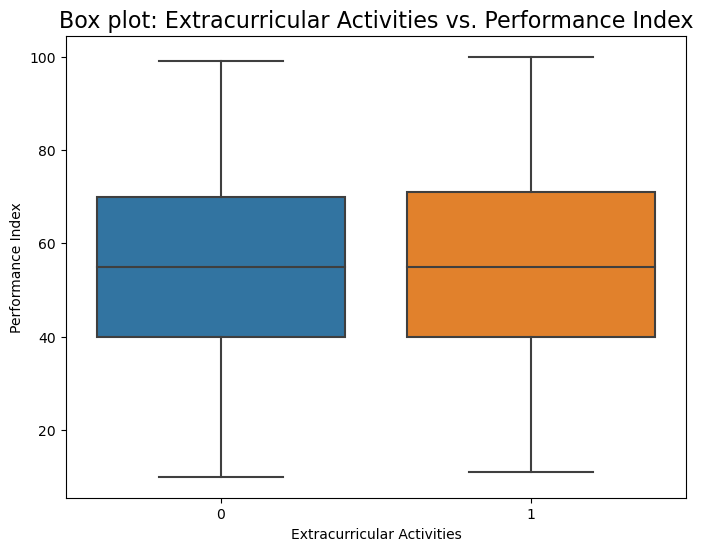

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=train)
plt.title('Box plot: Extracurricular Activities vs. Performance Index', fontsize=16)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

### Tác Động Của Hoạt Động Ngoại Khóa

Biểu đồ này so sánh chỉ số hiệu suất giữa học sinh **tham gia** và **không tham gia** hoạt động ngoại khóa.

- **Học sinh tham gia hoạt động ngoại khóa** có xu hướng đạt **hiệu suất cao hơn** so với những học sinh không tham gia, nhưng sự khác biệt này **không quá lớn**.
- Điều này cho thấy rằng tham gia hoạt động ngoại khóa có thể có **lợi ích tích cực** đối với hiệu suất học tập, nhưng có thể **không phải là yếu tố quyết định chính**.

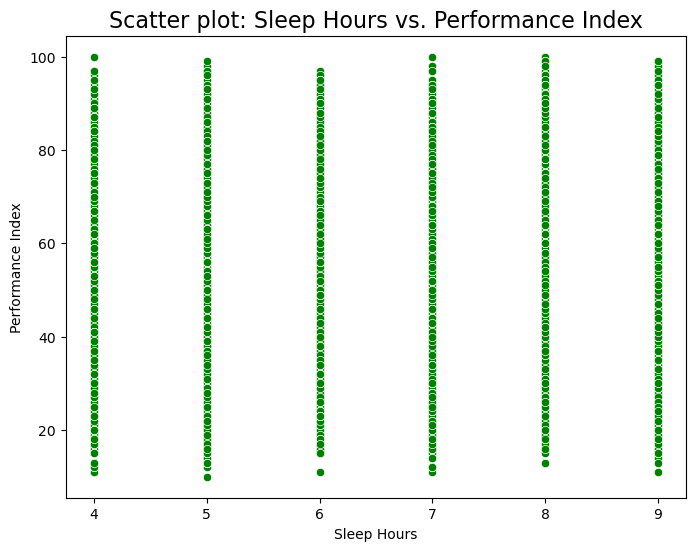

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Hours', y='Performance Index', data=train, color='green')
plt.title('Scatter plot: Sleep Hours vs. Performance Index', fontsize=16)
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

### Mối Quan Hệ Giữa Giờ Ngủ và Hiệu Suất

Biểu đồ này không cho thấy mối quan hệ rõ ràng giữa **số giờ ngủ** và **chỉ số hiệu suất**.

- Một số học sinh đạt **hiệu suất cao** với **số giờ ngủ ít**, trong khi một số học sinh khác đạt **hiệu suất tương tự** với **số giờ ngủ nhiều**.
- Điều này gợi ý rằng số giờ ngủ có thể **không phải là yếu tố quan trọng nhất** ảnh hưởng đến hiệu suất học tập, hoặc có thể có những **yếu tố khác** (như **chất lượng giấc ngủ**) mà chúng ta chưa xét đến trong dữ liệu này.


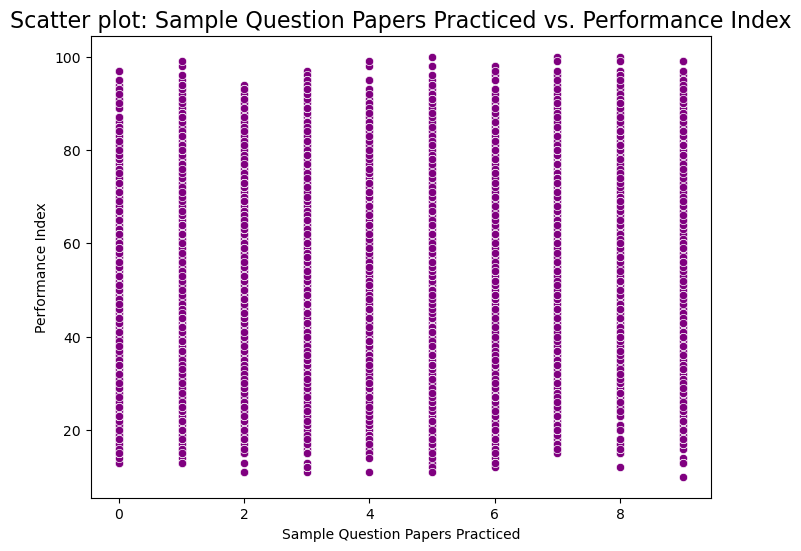

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sample Question Papers Practiced', y='Performance Index', data=train, color='purple')
plt.title('Scatter plot: Sample Question Papers Practiced vs. Performance Index', fontsize=16)
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

### Mối Quan Hệ Giữa Việc Luyện Tập và Hiệu Suất

Biểu đồ này cho thấy một **xu hướng nhẹ** giữa **số lượng đề thi mẫu được luyện tập** và **chỉ số hiệu suất**.

- Có một sự **gia tăng nhẹ** trong chỉ số hiệu suất khi **số lượng đề thi luyện tập** tăng lên, nhưng mối quan hệ này **không mạnh mẽ**.
- Điều này cho thấy việc luyện tập đề thi có thể **giúp cải thiện hiệu suất**, nhưng **hiệu quả có thể giảm dần** khi số lượng đề luyện tập tăng quá nhiều.


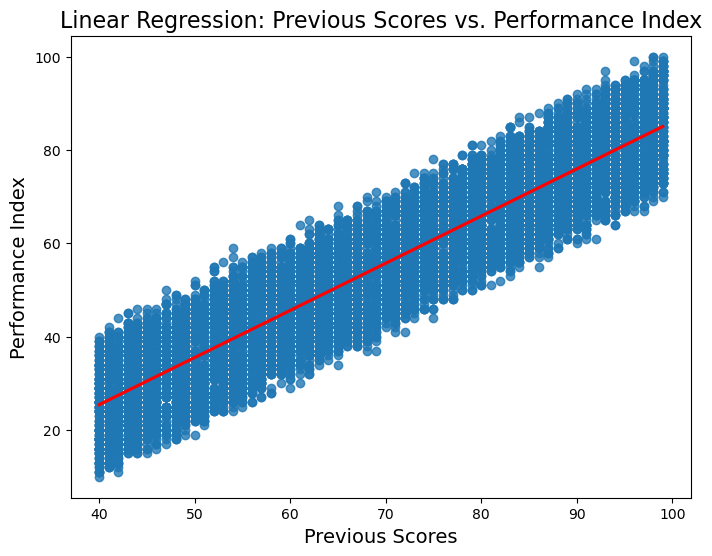

In [32]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Previous Scores', y='Performance Index', data=train, line_kws={"color": "red"})
plt.title('Linear Regression: Previous Scores vs. Performance Index', fontsize=16)
plt.xlabel('Previous Scores', fontsize=14)
plt.ylabel('Performance Index', fontsize=14)
plt.show()

### Biểu Đồ Hồi Quy Tuyến Tính Giữa Previous Scores và Performance Index

Biểu đồ hồi quy tuyến tính giữa **Previous Scores** và **Performance Index** cho thấy một **mối quan hệ tích cực** giữa hai biến số này: học sinh có **điểm số trước đây cao hơn** thường đạt **hiệu suất học tập cao hơn**.

- **Đường hồi quy màu đỏ** biểu thị xu hướng chung, nhưng vẫn có sự **phân tán dữ liệu**, cho thấy các **yếu tố khác ngoài điểm số trước đây** cũng ảnh hưởng đến hiệu suất học tập.


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [35]:
# Phần code cho yêu cầu 2a
model = OLSLinearRegression()
X_train_pro = preprocess(X_train)
model.fit(X_train_pro, y_train)
weights = model.get_params()
print(weights)

[-33.96928368   2.85202007   1.01786957   0.60428174   0.47356583
   0.19237624]


In [37]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
X_test_pro = preprocess(X_test)
res_mae = mae_cal(y_test, model.predict(X_test_pro))
print(res_mae)

1.5956486884762968


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + (2.852 * Hours Studied) + (1.018 * Previous Scores) + (0.604 * Extracurricular Activities) + (0.474 * Sleep Hours) + (0.192 * Sample Question Papers Practiced)$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [47]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
label = X_train.columns.values
list_mae = []
n_splits = 5

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train_shuffled = X_train.iloc[indices].reset_index(drop=True)
y_train_shuffled = y_train.iloc[indices].reset_index(drop=True)

X_splits = np.array_split(X_train_shuffled, n_splits)
y_splits = np.array_split(y_train_shuffled, n_splits)

for name in label:
    mae_list = []

    for i in range(n_splits):
        test_X = X_splits[i][[name]]
        test_y = y_splits[i]

        train_X = pd.concat([X_splits[j][[name]] for j in range(n_splits) if j != i])
        train_y = pd.concat([y_splits[j] for j in range(n_splits) if j != i])

        X_train_pro = preprocess(train_X)
        X_test_pro = preprocess(test_X)

        lr = OLSLinearRegression()
        lr.fit(X_train_pro, train_y)

        y_pred = lr.predict(X_test_pro)
        mae_value = mae_cal(test_y , y_pred)
        mae_list.append(mae_value)
    
    min_mae = np.min(mae_list)
    list_mae.append([name, min_mae])

min_mae_value = float('inf')
best_feature_model = None

for feature, mae in list_mae:
    if mae < min_mae_value:
        min_mae_value = mae
        best_feature_model = feature

print('The best feature is:', best_feature_model)

prediction = pd.DataFrame(list_mae, columns=['Mô hình 1 đặc trưng', 'MAE'])
prediction.insert(0, 'STT', range(1, len(prediction) + 1))
print(prediction)

The best feature is: Previous Scores
   STT               Mô hình 1 đặc trưng        MAE
0    1                     Hours Studied  14.995728
1    2                   Previous Scores   6.508067
2    3        Extracurricular Activities  15.800556
3    4                       Sleep Hours  15.778215
4    5  Sample Question Papers Practiced  15.793518


<center>

| STT | Mô hình với 1 đặc trưng                  | MAE   |
|:---:|:----------------------------------------:|:-----:|
|  1  | Hours Studied                            | 14.996|
|  2  | Previous Scores                          | 6.508 |
|  3  | Extracurricular Activities               | 15.801|
|  4  | Sleep Hours                              | 15.778|
|  5  | Sample Question Papers Practiced         | 15.794|

</center>


In [49]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
model = OLSLinearRegression()
X_train_pro = preprocess(pd.Series.to_frame(X_train[best_feature_model]))
model.fit(X_train_pro, y_train)
weights = model.get_params()
print(weights)

[-14.98864578   1.01050301]


In [51]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
X_test_pro = preprocess(pd.Series.to_frame(X_test[best_feature_model]))
res_mae = mae_cal(y_test,model.predict(X_test_pro))
print(res_mae)

6.5442772934525


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + (1.011 * Previous Scores)$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [53]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
def model1(X):
    return np.hstack((np.ones((X.shape[0], 1)), X.drop("Extracurricular Activities",axis = 1)))
def model2(X):
    return np.hstack((np.ones((X.shape[0], 1)),
                      X["Previous Scores"].to_frame(),
                      X["Hours Studied"].to_frame(),
                     (X["Previous Scores"] * X["Hours Studied"]).to_frame(name="Interaction")))

def model3(X):
    interaction_term = (X["Previous Scores"] * X["Hours Studied"]).to_frame(name="Interaction")

    return np.hstack((
        np.ones((X.shape[0], 1)), 
        X["Previous Scores"].to_frame(),
        X["Hours Studied"].to_frame(),
        interaction_term, 
        np.sqrt(X["Extracurricular Activities"].to_frame()),
        np.sqrt(X["Sleep Hours"].to_frame()),  
        np.sqrt(X["Sample Question Papers Practiced"].to_frame()),  
    ))

models = {
    "Model 1:": model1,
    "Model 2:": model2,
    "Model 3:": model3,
}


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [62]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
list_mae = []
n_splits = 5

indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)

X_train_shuffled = X_train.iloc[indices].reset_index(drop=True)
y_train_shuffled = y_train.iloc[indices].reset_index(drop=True)

X_splits = np.array_split(X_train_shuffled, n_splits)
y_splits = np.array_split(y_train_shuffled, n_splits)

for model_name, model_func in models.items():
    mae_list = []
    
    for i in range(n_splits):
        test_X = X_splits[i].copy()
        test_y = y_splits[i]

        train_X = pd.concat([X_splits[j] for j in range(n_splits) if j != i])
        train_y = pd.concat([y_splits[j] for j in range(n_splits) if j != i])

        X_train_pro = model_func(train_X)  # Transform the training data
        X_test_pro = model_func(test_X)    # Transform the test data
        
        lr = OLSLinearRegression()
        lr.fit(X_train_pro, train_y)

        y_pred = lr.predict(X_test_pro)
        mae_value = mae_cal(test_y , y_pred)
        mae_list.append(mae_value)
    
    mean_mae = np.mean(mae_list)
    list_mae.append([model_name, mean_mae])

min_mae_value = float('inf')
my_best_model = None

for model_name, mae in list_mae:
    if mae < min_mae_value:
        min_mae_value = mae
        my_best_model = model_name

print('The best model is:', my_best_model)

# Output the results
prediction = pd.DataFrame(list_mae, columns=['Mô hình', 'MAE'])
prediction.insert(0, 'STT', range(1, len(prediction) + 1))
print(prediction)

The best model is: Model 3:
   STT   Mô hình       MAE
0    1  Model 1:  1.640885
1    2  Model 2:  1.816383
2    3  Model 3:  1.628763


<center>

| STT |           Mô hình          | MAE  |
|:---:|:--------------------------:|:----:|
|  1  | Sử dụng 4 đặc trưng trừ Extracurricular Activities | 1.641     |
| 2 | Sử dụng 2 đặc trưng tương quan cao nhất + biến tương tác giữa chúng                      | 1.816     |
|  3  | Sử dụng 2 đặc trưng tương quan cao nhất + biến tương tác giữa chúng + sqrt của 3 đặc trưng còn lại| 1.629     |

</center>

In [57]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
model = OLSLinearRegression()
X_train_pro = models[my_best_model](X_train)
model.fit(X_train_pro, y_train)
weights = model.get_params()
print(weights)

[-3.72135178e+01  1.01861011e+00  2.86173171e+00 -1.54740867e-04
  5.99285155e-01  2.36743126e+00  6.02155925e-01]


In [59]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
X_test_pro = models[my_best_model](X_test)
res_mae = mae_cal(y_test,model.predict(X_test_pro))
print(res_mae)

1.6079151203240423


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -3.721 + 1.019 * Previous Scores + 2.862 * Hours Studied - 1.547 * (Previous Scores * Hours Studied) + 5.993 * \sqrt{Extracurricular Activities}+ 2.367 * \sqrt{Sleep Hours} + 6.022 * \sqrt{Sample Question Papers Practiced}$$